In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [2]:
# read the data
data = pd.read_csv('train.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# EDA & Data analysis

In [3]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [4]:
data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [5]:
#cleaning data
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


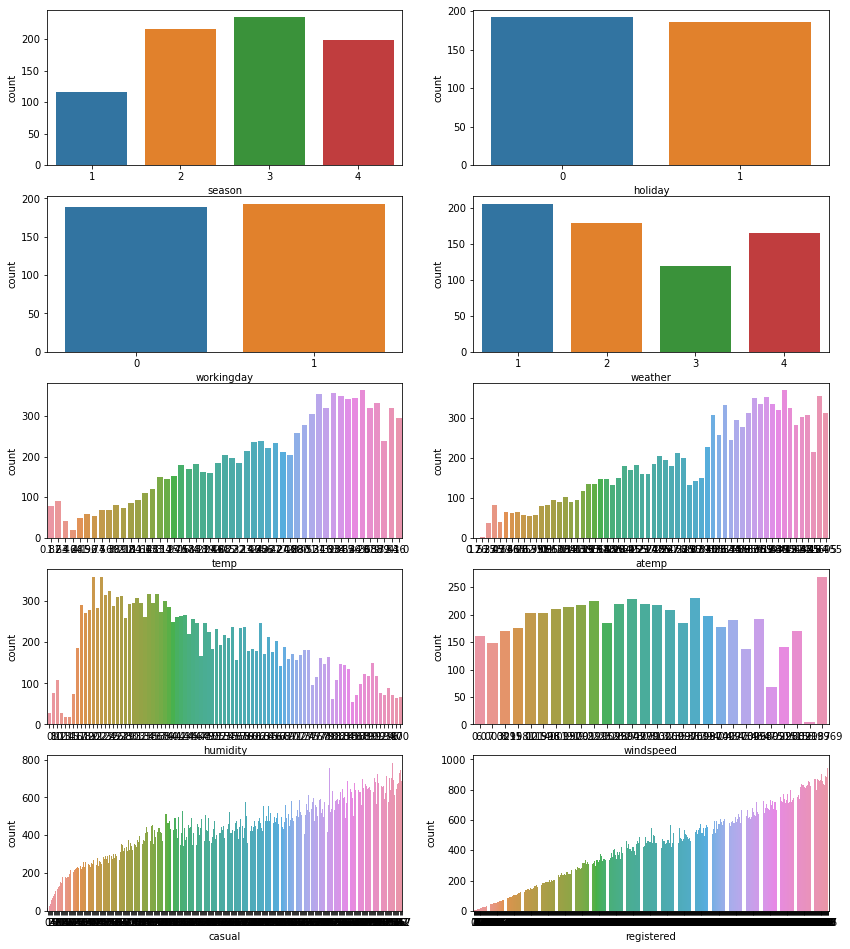

In [7]:
fig = plt.figure(figsize=(14,20))
# season - count
ax1 = fig.add_subplot(6,2,1)
ax1 = sns.barplot(x = 'season', y = 'count', data = data.groupby('season')['count'].mean().reset_index())
#holiday - count
ax2 = fig.add_subplot(6,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=data.groupby('holiday')['count'].mean().reset_index())

#workingday - count
ax3 = fig.add_subplot(6,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=data.groupby('workingday')['count'].mean().reset_index())

#hour - count
ax4 = fig.add_subplot(6,2,4)
ax4 = sns.barplot(x='weather',y='count',data=data.groupby('weather')['count'].mean().reset_index())
#month - count
ax5 = fig.add_subplot(6,2,5)
ax5 = sns.barplot(x='temp',y='count',data=data.groupby('temp')['count'].mean().reset_index())

#atemp - count
ax6 = fig.add_subplot(6,2,6)
ax6 = sns.barplot(x='atemp',y='count',data=data.groupby('atemp')['count'].mean().reset_index())

#humidity - count
ax7 = fig.add_subplot(6,2,7)
ax7 = sns.barplot(x='humidity',y='count',data=data.groupby('humidity')['count'].mean().reset_index())

#windspeed - count
ax7 = fig.add_subplot(6,2,8)
ax7 = sns.barplot(x='windspeed',y='count',data=data.groupby('windspeed')['count'].mean().reset_index())

#casual - count
ax7 = fig.add_subplot(6,2,9)
ax7 = sns.barplot(x='casual',y='count',data=data.groupby('casual')['count'].mean().reset_index())

#registered - count
ax7 = fig.add_subplot(6,2,10)
ax7 = sns.barplot(x='registered',y='count',data=data.groupby('registered')['count'].mean().reset_index())

In [8]:
feature=data.drop(columns=[ 'datetime', 'holiday', 'workingday','atemp', 'casual', 'registered'])


In [9]:
#Feature normalization

In [10]:
scaler=MinMaxScaler()
scaler.fit(feature)
data=scaler.transform(feature)
data=pd.DataFrame(data,columns=[ 'season', 'weather', 'temp', 'humidity', 'windspeed','count'])
data

,season,weather,temp,humidity,windspeed,count
0,0.0,0.0,0.224490,0.81,0.000000,0.015369
1,0.0,0.0,0.204082,0.80,0.000000,0.039959
2,0.0,0.0,0.204082,0.80,0.000000,0.031762
3,0.0,0.0,0.224490,0.75,0.000000,0.012295
4,0.0,0.0,0.224490,0.75,0.000000,0.000000
...,...,...,...,...,...,...
10881,1.0,0.0,0.367347,0.50,0.456213,0.343238
10882,1.0,0.0,0.346939,0.57,0.263195,0.245902
10883,1.0,0.0,0.326531,0.61,0.263195,0.171107
10884,1.0,0.0,0.326531,0.61,0.105325,0.131148


In [12]:
#Delete columns that do not affect the 'count' .
#'datetime' shall not be used.
#'holiday' & 'workingday' because it does not distinct the data.
#'atemp', We use one temperature indicator 
#'casual'+'registered'='count' 
x=data.drop(columns=['count'])
y=data['count'].values

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [14]:
poly=PolynomialFeatures(degree=1)
x_poly=poly.fit_transform(x)
poly.fit(x_poly,y)


PolynomialFeatures(degree=1)

In [16]:
y_prediction =  lin_reg.predict(x_poly)
y_prediction

array([0.00706282, 0.00355333, 0.00355333, ..., 0.18112474, 0.17592904,
       0.15551801])

In [17]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y,y_prediction))

r2 socre is  0.2588589372155983
mean_sqrd_error is== 0.025527684706330586
root_mean_squared error of is== 0.15977385488974905


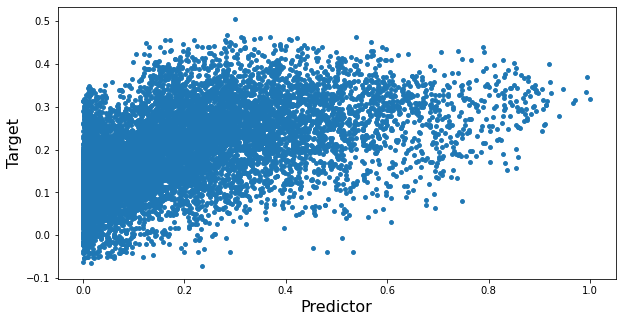

In [24]:
# plotting dataset
plt.figure(figsize=(10,5))
#plt.scatter(y,y_prediction,s=15)
plt.scatter(y,y_prediction,s=15)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [25]:
import pickle

In [27]:
filename = 'final_model.sav'
pickle.dump(lin_reg, open(filename, 'wb'))

In [28]:
loaded_model = pickle.load(open('final_model.sav', 'rb'))
loaded_model

LinearRegression()

In [30]:
testData=pd.read_csv('test.csv')
testData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
